In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import paleo
from mastodon_functions import xml_features, csv_reader

# 1 - Analysis of cell tracks - Inspection of traces

In this notebook we will import the .csv files obtained from Mastodon to have a first look on how the cell tracks look like. You will be able to observe the traces all together and play with the different channels and normalize the traces to have a better channel-to-channel comparison. Moreover, you will be able to observe the dynamics of each individual trace. 

<a id='top'></a>
## Table of contents

[1] [Image Characteristics](#image): Check whether the uploaded files are indeed corresponding with the right images and imaging parameters.  

[2] [Inspect all tracks](#all): Here you can inspect all the traces or a group of cells. Be careful, if you have too many traces you might want to plot them in groups to avoid loading all the memory!      

[3] [Inspect individual tracks](#individual): Here you can inspect each track individually.  

[4] [Code ir yourself!](#code): Until now all the code has been hidden and you only had to click a few boxes. In case you want to try coding yourself, we show you a some lines that will be useful to start preparing your own code. 

## How to obtain the .csv file from Mastodon?

Once you have finished the tracking and you want to check the cell traces, the first step is to **Compute the Features** from the Mastodon Menu in order to extract the spots intensity, XYZ coordinates of the centroid, spots IDs, etc.
<img src="../Images-Notebook/ComputeFeatures-Mastodon.png" width="500" align="center">

Once the feature calculation is over (all the clocks became green spots), you can create the table which will then be saved as a .csv file with all the computed features. 

<img src="../Images-Notebook/CSVFile-Mastodon.png" width="650" align="center">

Save the .csv file and to run this notebook you will then need to specify the path and the file name to start inspecting the traces. 

## Folder and data paths

In the next cell, you need to specify:
- ``path_xml``: Path and file name of the .xml file obtained from converting the data to HDF5/XML is stored.
- ``path_csv``: Path and file name of the .csv file obtained from the tracks from Mastodon. You do not need to add the -edges or -vertices extension.

In [2]:
# Path to .xml file generated when creating the .hdf5
path_xml = '../Data/Position2_20191213.xml' # Path to .xml file
#path_xml = '../../Data/Bulk Data/dataset.xml'

# Path to the -edges.csv amd -vertices.csv files (You only need path + name of file without the -edges or -vertices extension)
path_csv = '../Data/Position2-20191213-v19' 
#path_csv = '../../Data/Bulk Data/dataset'

## Image characteristics
<a id='image'></a>

Because we stored the data as an XML/HDF5, the .xml file contains all the metadata we need. We will now extract it in order to know pixel size, number of planes, image dimensions  and total number of timepoints. 

You only need to specify the temporal resolution in seconds that you used to acquire the data (``tr``). 

If you want to go back to the table of contents click [here](#top).

In [3]:
# Time resolution in seconds (how often do you acquire time points)
tr = 90
tr_min = round(tr/60,2) # in minutes

fts = xml_features(path_xml)

# Features from the image obtained from the .xml generated by BigData Viewer
print('The image has the following dimensions (XYZC): %d, %d, %d, %d'%(fts.width, fts.height, fts.n_slices, fts.channels))
print('There are %d frames in total.'%fts.n_frames)
print('Pixel Size: x = %.3g %s, y = %.3g %s z = %.2g %s'%(fts.x_pixel, fts.units, fts.y_pixel, fts.units, fts.z_pixel, fts.units))
print('There are %d Z-slices in total'%fts.n_slices)

The image has the following dimensions (XYZC): 2048, 2048, 150, 2
There are 299 frames in total.
Pixel Size: x = 0.347 micron, y = 0.347 micron z = 1.5 micron
There are 150 Z-slices in total


## Data organization: build the cell tracks
<a id='all'></a>

The function ``csv_reader`` obtain all the features from each individual spot as a single unit. These spots are then rearranged according to their cell track. As a result, we get a new object called ``tracks``.

By pressing  ``tracks.`` + <kbd>TAB</kbd>, a list will pop with all the different variables you can obtain from the spot object or the tracks obtject. 

If you want to go back to the table of contents click [here](#top).

In [4]:
# Order the time series according to each individual cell
tracks = csv_reader(path_csv, path_xml)

## Plot all the cell tracks

Now that we organized the data, the next step is to plot the cell traces we obtained. For now, we will plot all the cells together. You can choose among the interactive options to make adjust the plot to your needs:
- **Y and X limits:** This slider will change the max and min values for the Y and X axis respectively.
- **Channel ticks:** You chan shift from observing one or more channels at the same time. 
- **Normalization:** Because sometimes different channels can have different intensity levels, you can choose tor normalize the traces by the overall maxima (for each specific channel) so that it is easier to compare
- **X and Y labels:** Write down what you would like to call the X and Y label and then press <kbd>ENTER</kbd>
- **Title:** Write down what you would like to call the X and Y label and then press <kbd>ENTER</kbd>

Moreover, feel free to play with the Widgets Menu which allows for more interactive features plus the possibility to save the image as a PNG. If you want to restore to the default settings, click on the *House* symbol. 

<img src="../Images-Notebook/WidgetsMenu.png" width="300" align="center">



> <font color='orange'> **⚠ WARNING**:</font> *If you run any other cell, in order to use the interactive features of the cell bellow, run it againr*

In [5]:
%matplotlib widget
plt.style.use('mastodon_style.mplstyle')

paleo.AllTracks(path_csv, path_xml, tr_min)

FloatProgress(value=4.3, description='CPU %:', style=ProgressStyle(bar_color='blue'))

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

AllTracks(children=(Tab(children=(VBox(children=(ToggleButton(value=False, description='Interactivity', icon='…

## Interact with the traces 
<a id='individual'></a>

In the next Jupyter cells you will be able to inspect the tracks obtained from Mastodon by observing each individual cell. As beforem you have a series of interactive options:

- **Cell #:** Choose any cell you want by moving the slider.
- **Y and X limits:** This slider will change the max and min values for the Y and X axis respectively.
- **Fix Y and X limits:** If you do not click this options, the axis will adjust according to the maxima of each cell. If you want to specify some specific limits, you can fix the axes with these checkboxes. 
- **Channel ticks:** You chan shift from observing one or more channels at the same time. 
- **Color pickers:** For each individual channel, feel free to choose any color either by clicking on the color picker menu or by typing the name
- **Normalization:** Because sometimes different channels can have different intensity levels, you can choose tor normalize the traces by the overall maxima (for each specific channel) so that it is easier to compare
- **X and Y labels:** Write down what you would like to call the X and Y label and then press <kbd>ENTER</kbd>
- **Title:** Write down what you would like to call the X and Y label and then press <kbd>ENTER</kbd>

Same as above, feel free to play with the Widgets Menu which allows for more interactive features plus the possibility to save the image as a PNG. If you want to restore to the default settings, click on the *House* symbol. 

More over, you can see the CPU percentage, which represents the current system-wide CPU utilization as a percentage.

<img src="../Images-Notebook/WidgetsMenu.png" width="300" align="center">



> <font color='orange'> **⚠ WARNING**:</font> *If you run any other cell, in order to use the interactive features of the cell bellow, run it againr*

If you want to go back to the table of contents click [here](#top).

In [6]:
%matplotlib widget
plt.style.use('mastodon_style.mplstyle')

paleo.IndividualTracks(path_csv, path_xml, tr_min)

FloatProgress(value=13.6, description='CPU %:', style=ProgressStyle(bar_color='blue'))

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

IndividualTracks(children=(Tab(children=(VBox(children=(ToggleButton(value=False, description='Interactivity',…

## Tags and subtags

In [ ]:
tracks.data_df_sorted.keys()

In [ ]:
f'{tracks.tags[0]} {tracks.sub_tags[0]}'

In [ ]:
tracks.sub_tags

In [ ]:
np.unique(tracks.tags)[0]

In [ ]:
tracks.data_df_sorted.keys()[0]

## Code it yourself! 
<a id='code'></a>

In the following cells, you will learn how to use the `tracks` object generated by `paleo.py` so that you can plot whivh ever cell you want! You will also learn some basic functions of important python libraries like [`numpy`](https://numpy.org), [`pandas`](https://pandas.pydata.org) and [`matplotlib`](https://matplotlib.org). 

If you want to go back to the table of contents click [here](#top).

### How does the data from paleo look like?

We will mainly use a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) generated from paleo were all the tracks features are saved. We can call this `DataFrame` by calling: `tracks.data_df_sorted`. By using the extension `.head()` we can see all the columns and the first 5 rows of the table. 

In [5]:
tracks.data_df_sorted.head()

Spot ID    Mean ch1    Std ch1  Min ch1  Max ch1  Median ch1  \
Track ID                                                                     
0        337      336  189.850694  14.727322    148.0    196.0       190.0   
         14        13  184.965157  14.209429    140.0    195.0       185.0   
         15        14  179.885621  14.857906    130.0    189.0       181.0   
         16        15  176.255738  15.404422    118.0    186.0       177.0   
         17        16  170.093248  12.671316    129.0    185.0       171.0   

              Sum ch1     Mean ch2     Std ch2  Min ch2  ...  Position PSMd  \
Track ID                                                 ...                  
0        337  54677.0  3916.961806  248.995043   3246.0  ...            1.0   
         14   53085.0  3980.867596  181.460441   3336.0  ...            1.0   
         15   55045.0  4279.885621  189.750907   3665.0  ...            1.0   
         16   53758.0  4054.914754  191.530022   3478.0  ...            1.0   
         17   52899.0  3955.678457  184.986607   3404.0  ...            1.0   

              Position PSMc  Position TB  Somite S1  Somite S2  Somite S3  \
Track ID                                                                    
0        337            0.0          0.0        0.0        0.0        0.0   
         14             0.0          0.0        0.0        0.0        0.0   
         15             0.0          0.0        0.0        0.0        0.0   
         16             0.0          0.0        0.0        0.0        0.0   
         17             0.0          0.0        0.0        0.0        0.0   

              Somite S4  Somite S5  TB Tag  lateral Tag  
Track ID                                                 
0        337        1.0        0.0     0.0          0.0  
         14         1.0        0.0     0.0          0.0  
         15         1.0        0.0     0.0          0.0  
         16         1.0        0.0     0.0          0.0  
         17         1.0        0.0     0.0          0.0  

[5 rows x 42 columns]

### Find a cell track of interest, and plot it!

In [6]:
# (0) How does the Mean intensity look like for cell track id # 1?
id_of_interest = 1

# (1) Find all the rows which contain the Track ID of interest
indices = tracks.data_df_sorted['Track ID']==id_of_interest

# As a result, we get True or Flase depending on whether that row contains a spot of track id # 1
indices

Track ID      
0         337     False
          14      False
          15      False
          16      False
          17      False
                  ...  
127       2337    False
          2338    False
          2339    False
          2340    False
          2341    False
Name: Track ID, Length: 21467, dtype: bool

Now we will use the `.loc` function from `pandas` to get all the rows with a True index in the column of frames and mean intensity for a specific channel. We then add the `.values` extension to get an array which is easier for plotting. 

In [7]:
# (2) Find the frames and intensity for that id
frames = tracks.data_df_sorted.loc[indices, 'Frames'].values
mean_intensity = tracks.data_df_sorted.loc[indices, 'Mean ch1'].values

Finally, we are going to plot the result using the library `matplotlib`. This libary can be called using the prefix `plt.` Finally, we multiply by `tr_min` to get values in minutes.

(110.0, 600.0)

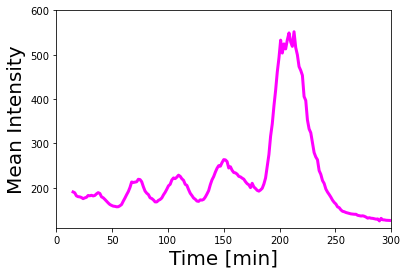

In [8]:
# (3) Plot the cell track # 1
%matplotlib inline 

# To make the plot look nicer! 
kwargs = {'linewidth': 3, 
          'color': 'magenta'}

plt.plot(frames*tr_min, mean_intensity, **kwargs)

# (4) Add some axes and labels!
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.xlim([0,300])
plt.ylim([110,600])

#### Plot more than one cell? 

To do so you just need to repeat the same steps as before but this time, using a *for loop*.

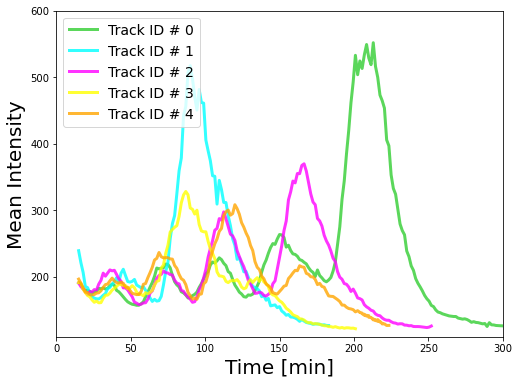

In [9]:
# (0) How does the Mean intensity look like for several track IDs
id_of_interest = [1,2,3,4,5]

# If you do not specify color, matplotlib will chose for you the default ones
colors = ['limegreen', 'cyan', 'magenta', 'yellow', 'orange']

%matplotlib inline 

# Chose size of plot
plt.figure(figsize=[8,6])

for i,val in enumerate(id_of_interest):

    # (1) Find all the rows which contain the Track ID of interest
    indices = tracks.data_df_sorted['Track ID']==val
    
    # (2) Find the frames and intensity for that id
    frames = tracks.data_df_sorted.loc[indices, 'Frames'].values
    mean_intensity = tracks.data_df_sorted.loc[indices, 'Mean ch1'].values
    
    # To make the plot look nicer!
    kwargs = {'linewidth': 3, 
              'color': colors[i],
              'alpha': 0.8,
              'label': f'Track ID # {i}'}

    # (3) Plot the cell tracks
    plt.plot(frames*tr_min, mean_intensity, **kwargs)

# (4) Add some axes and labels!
plt.xlabel('Time [min]', fontsize=20)
plt.ylabel('Mean Intensity', fontsize=20)
plt.xlim([0,300])
plt.ylim([110,600])

# We now have a legend to know which cell is which!
plt.legend(loc='upper left', fontsize=14)

Now that you know the basics, you can start creating your own plots! 

If you want to go back to the table of contents click [here](#top).

## Your own code here